# IMPORT ALL REQUIREMENTS

In [239]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from xgboost import XGBClassifier

## import data csv

In [240]:
# df = pd.read_csv("./data_uang_gemastik.csv")
df = pd.read_excel("./data_uang_gemastik.xlsx")

In [241]:
df

,red_freq,green_freq,blue_freq,value
0,133,138,132,2000
1,133,138,132,2000
2,129,135,128,2000
3,129,135,128,2000
4,129,135,131,2000
...,...,...,...,...
5555,90,103,97,100000
5556,85,82,61,100000
5557,85,82,61,100000
5558,57,74,91,100000


In [242]:
df.dtypes

red_freq      int64
green_freq    int64
blue_freq     int64
value         int64
dtype: object

# EDA

## Data Preprocessing and Feature Engineering

In [243]:
# drop the date time column

# df = df.drop(columns=["Date", "Time"])
# df.dropna(inplace=True)

In [244]:
display(df)

,red_freq,green_freq,blue_freq,value
0,133,138,132,2000
1,133,138,132,2000
2,129,135,128,2000
3,129,135,128,2000
4,129,135,131,2000
...,...,...,...,...
5555,90,103,97,100000
5556,85,82,61,100000
5557,85,82,61,100000
5558,57,74,91,100000


In [245]:
df['value'] = df['value'].astype(int).astype(str)

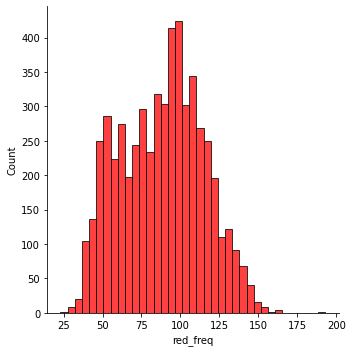

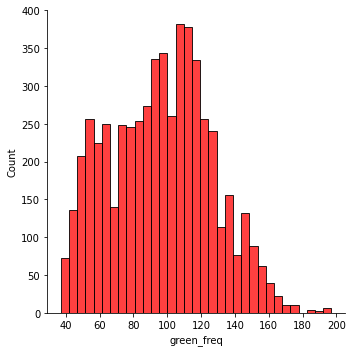

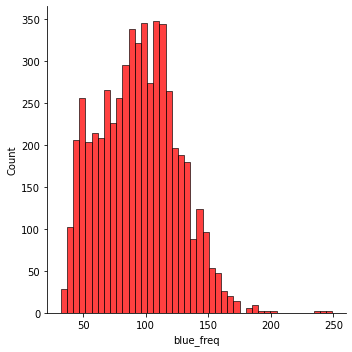

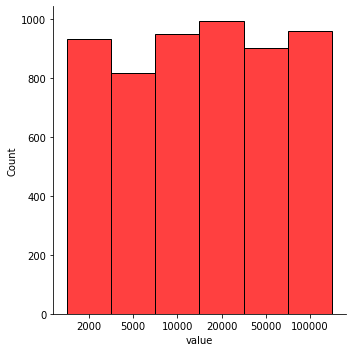

In [246]:
for i in df.columns:
    sns.displot(data=df[i], color="red")

In [247]:
display(df)

,red_freq,green_freq,blue_freq,value
0,133,138,132,2000
1,133,138,132,2000
2,129,135,128,2000
3,129,135,128,2000
4,129,135,131,2000
...,...,...,...,...
5555,90,103,97,100000
5556,85,82,61,100000
5557,85,82,61,100000
5558,57,74,91,100000


In [248]:
## scaling dengan MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [249]:
# memex = MinMaxScaler()
# col = ["Red Freq", "Blue Freq", "Green Freq"]
# df[col] = memex.fit_transform(df[col])
# display(df)

## Feature Engineering

setelah melihat pola pada nilai frekuensi r,g, dan b. ditemukan kemiripan untuk selisih r-g, r-b, dan g-b. maka akan dibuat feature baru pada data

In [250]:
df["r-g"] = abs(df["red_freq"] - df["green_freq"])
df["r-b"] = abs(df["red_freq"] - df["blue_freq"])
df["g-b"] = abs(df["green_freq"] - df["blue_freq"])
df

,red_freq,green_freq,blue_freq,value,r-g,r-b,g-b
0,133,138,132,2000,5,1,6
1,133,138,132,2000,5,1,6
2,129,135,128,2000,6,1,7
3,129,135,128,2000,6,1,7
4,129,135,131,2000,6,2,4
...,...,...,...,...,...,...,...
5555,90,103,97,100000,13,7,6
5556,85,82,61,100000,3,24,21
5557,85,82,61,100000,3,24,21
5558,57,74,91,100000,17,34,17


# Modelling

In [251]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, mean_squared_error, roc_auc_score, auc, roc_curve, recall_score, confusion_matrix




In [252]:
X = df.drop(columns="value")
y = df["value"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [253]:
display(X_train)
display(y_train)

,red_freq,green_freq,blue_freq,r-g,r-b,g-b
3887,59,44,36,15,23,8
70,94,108,82,14,12,26
3869,57,59,64,2,7,5
2402,91,114,115,23,24,1
2576,111,110,74,1,37,36
...,...,...,...,...,...,...
3772,99,95,84,4,15,11
5191,82,113,111,31,29,2
5226,65,64,75,1,10,11
5390,41,52,46,11,5,6


3887     50000
70        2000
3869     50000
2402     10000
2576     10000
         ...  
3772     50000
5191    100000
5226    100000
5390    100000
860       2000
Name: value, Length: 4448, dtype: object

In [254]:
# decision_tree = DecisionTreeClassifier(random_state=42)
# random_forest = RandomForestClassifier(random_state=42)
# svc = SVC(kernel="linear", random_state=42)
# logistic_regression = LogisticRegression(random_state=42)
# knn = KNeighborsClassifier(n_neighbors=6)
# models = [("Decision Tree",decision_tree), ("Random Forest", random_forest), ("SVC", svc), ("Logistic Regression", logistic_regression), ("KNN", knn) ]
xgb = XGBClassifier(learning_rate = 1, gamma = 0.1, max_depth = 9, n_estimators = 500)
xgb_model = ("XGBoost", xgb)

In [255]:
from sklearn.preprocessing import LabelEncoder

label = {
    "1000":0,
    "2000":1,
    "5000":2,
    "10000":3,
    "20000":4,
    "50000":5,
    "100000":6
}

# Create a custom LabelEncoder class
class CustomLabelEncoder(LabelEncoder):
    def __init__(self, label_dict):
        self.label_dict = label_dict
        super().__init__()

    def fit(self, y):
        super().fit(y)
        self.classes_ = [self.label_dict[label] for label in self.classes_]

    def transform(self, y):
        return super().transform(y)

    def inverse_transform(self, y):
        y_original = [list(self.label_dict.keys())[list(self.label_dict.values()).index(encoded)] for encoded in y]
        return y_original
    

# Initialize the LabelEncoder
label_encoder = CustomLabelEncoder(label)

# Fit the LabelEncoder to your target classes and transform them
y_train_encoded = label_encoder.fit_transform(y_train)

In [256]:
print(y_train_encoded)

[5 2 5 ... 1 1 2]


### Training

In [257]:
# for i in models:
#     i[1].fit(X_train, y_train)
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'min_child_weight': [1, 2, 3],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=10,  # Number of random combinations to try
    cv=3,  # Number of cross-validation folds
    scoring='accuracy',
    verbose=1,
    n_jobs=-1,  # Use all available CPU cores for parallel processing
    random_state=42  # Set a random seed for reproducibility
)

# random_search.fit(X_train, y_train_encoded)

xgb.fit(X_train, y_train_encoded)

# best_params = random_search.best_params_
# best_xgb_model = random_search.best_estimator_
# print(best_params)
# print(best_xgb_model)

# best_xgb = ("XGBoost", best_xgb_model)





XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

### Prediction

XGBoost f1 score= 0.8637686333734644
XGBoost accuracy = 0.8633093525179856
XGBoost precision = 0.8654692646131226
XGBoost recall = 0.863062822682112
['20000', '50000', '1000', '10000', '50000', '2000', '1000', '10000', '5000', '20000', '1000', '50000', '10000', '2000', '50000', '10000', '5000', '20000', '20000', '1000', '5000', '50000', '1000', '2000', '5000', '5000', '1000', '50000', '1000', '5000', '20000', '1000', '10000', '20000', '5000', '1000', '5000', '2000', '2000', '50000', '50000', '20000', '20000', '50000', '2000', '2000', '10000', '10000', '2000', '1000', '2000', '10000', '10000', '50000', '20000', '5000', '50000', '10000', '50000', '5000', '1000', '10000', '20000', '1000', '50000', '1000', '5000', '10000', '10000', '50000', '2000', '2000', '5000', '10000', '1000', '2000', '5000', '1000', '5000', '10000', '5000', '10000', '50000', '50000', '5000', '2000', '2000', '50000', '50000', '1000', '5000', '2000', '2000', '10000', '10000', '1000', '10000', '10000', '10000', '1000', '

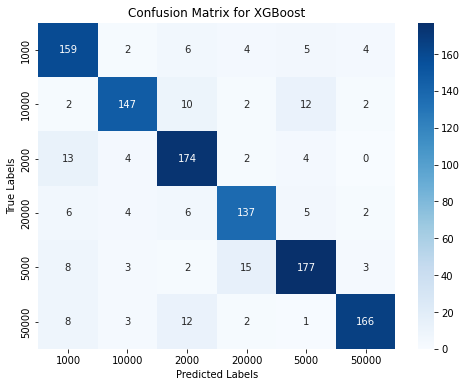

In [258]:
# model_names = []
# y_preds = []


# for model in models:    
#     y_pred = model[1].predict(X_test)

#     # Calculate the confusion matrix
#     # confusion = confusion_matrix(y_true=y_test, y_pred=y_pred)

#     # # Print the confusion matrix
#     # print(f"Confusion matrix for {model[0]}:")
#     # print(confusion)

#     f1 = f1_score(y_true=y_test, y_pred=y_pred, average='weighted')
#     accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
#     precision = precision_score(y_test, y_pred, average='micro')
#     mse = mean_squared_error(y_test, y_pred)
#     recall = recall_score(y_test, y_pred, average='micro')
#     print(f"{model[0]} f1 score= {f1}")
#     print(f"{model[0]} accuracy = {accuracy}")
#     print(f"{model[0]} precision = {precision}")
#     print(f"{model[0]} recall = {recall}")
#     print(f"{model[0]} mse = {mse}")
#     confusion = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=sorted(set(y_test)))
#     model_name = model[0]

#     # Create a heatmap for the confusion matrix
#     plt.figure(figsize=(8, 6))
#     sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues",
#                 xticklabels=sorted(set(y_test)), yticklabels=sorted(set(y_test)))
#     plt.title(f"Confusion Matrix for {model_name}")
#     plt.xlabel("Predicted Labels")
#     plt.ylabel("True Labels")
#     plt.show()

y_test = label_encoder.fit_transform(y_test)


y_pred = xgb_model[1].predict(X_test)

# Calculate the confusion matrix
# confusion = confusion_matrix(y_true=y_test, y_pred=y_pred)

# # Print the confusion matrix
# print(f"Confusion matrix for {xgb_model[0]}:")
# print(confusion)
y_test = label_encoder.inverse_transform(y_test)
y_pred = label_encoder.inverse_transform(y_pred)
f1 = f1_score(y_true=y_test, y_pred=y_pred, average='weighted')
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
print(f"{xgb_model[0]} f1 score= {f1}")
print(f"{xgb_model[0]} accuracy = {accuracy}")
print(f"{xgb_model[0]} precision = {precision}")
print(f"{xgb_model[0]} recall = {recall}")
print(y_pred)
confusion = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=sorted(set(y_test)))
xgb_model_name = xgb_model[0]

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=sorted(set(y_test)), yticklabels=sorted(set(y_test)))
plt.title(f"Confusion Matrix for {xgb_model_name}")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### Analisis hasil prediksi

Dari hasil prediksi, model decision tree dan random forest memiliki akurasi tertinggi yaitu sekitar 95%

### pemilihan model setelah hasil analisis

In [259]:
# model = models[1][1]
# model = KNeighborsClassifier(n_neighbors=20)
model = XGBClassifier(random_state=42, learning_rate = 1, gamma = 0.1, max_depth = 9, n_estimators = 500)
y = label_encoder.fit_transform(y)
print(y)
model.fit(X, y)


[2 2 2 ... 1 1 1]


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

### Import model

In [260]:
# import joblib
# model_filename = 'model.joblib'
# joblib.dump(model, model_filename)
model.save_model('xgboost_model.bin')# Assuming you have a trained XGBoost model object named 'model'
model.save_model('xgboost_model.json')
